# Neural Network

__Imports__

In [1]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from tensorflow.keras import Sequential, layers


style.use("fivethirtyeight")
# import jupyterthemes as jt
# context = jt.jtplot.set_context('poster')
# jt.jtplot.set_style(context, 'monokai', ticks=True, spines=True)
# jt.stylefx.style_layout('nb_style', theme='monokai',
#                         toolbar=True, nbname=True, cellwidth='1000')
# jt.stylefx.set_nb_theme('monokai')


## Read in the data and instantiate models

In [2]:
df = pd.read_csv("../data/device_failure_data_scientist.csv")
df.head()

,date,device,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,failure
0,15001,S1F01085,215630672,56,0,52,6,407438,0,0,7,0
1,15001,S1F0166B,61370680,0,3,0,6,403174,0,0,0,0
2,15001,S1F01E6Y,173295968,0,0,0,12,237394,0,0,0,0
3,15001,S1F01JE0,79694024,0,0,0,6,410186,0,0,0,0
4,15001,S1F01R2B,135970480,0,0,0,15,313173,0,0,3,0


In [3]:
feat = ['attribute2', 'attribute4', 'attribute7',
        'attribute8']  
features = df.drop(columns=['date', 'device', 'failure'])

labels = df['failure']

In [109]:
lb = LabelBinarizer()

X = features
# y = tf.keras.utils.to_categorical(lb.fit_transform(labels), num_classes=2)
y = labels

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    shuffle=False)

In [23]:
ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [24]:
print(X_train_ss.shape)
print(X_test_ss.shape)
print(y_train.shape)
print(y_test.shape)

(93370, 9)
(31124, 9)
(93370, 2)
(31124, 2)


In [26]:
model = Sequential()

model.add(layers.Dense(32, input_shape=(9,), activation='relu'))

model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(2, activation='sigmoid'))

model.summary()

model.compile(
    loss='binary_crossentropy', 
    metrics=['accuracy'], 
    optimizer='rmsprop')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                320       
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 66        
Total params: 3,554
Trainable params: 3,554
Non-trainable params: 0
_________________________________________________________________


In [27]:
hist = model.fit(X_train_ss,
                   y_train,
                   epochs=20,
                   batch_size=128,
                   validation_split=0.25,
                   verbose=2)

Train on 70027 samples, validate on 23343 samples
Epoch 1/20
70027/70027 - 3s - loss: 0.0438 - accuracy: 0.9944 - val_loss: 0.0241 - val_accuracy: 0.9987
Epoch 2/20
70027/70027 - 2s - loss: 0.0087 - accuracy: 0.9993 - val_loss: 0.0139 - val_accuracy: 0.9987
Epoch 3/20
70027/70027 - 2s - loss: 0.0056 - accuracy: 0.9993 - val_loss: 0.0153 - val_accuracy: 0.9987
Epoch 4/20
70027/70027 - 2s - loss: 0.0054 - accuracy: 0.9993 - val_loss: 0.0132 - val_accuracy: 0.9987
Epoch 5/20
70027/70027 - 2s - loss: 0.0055 - accuracy: 0.9993 - val_loss: 0.0149 - val_accuracy: 0.9987
Epoch 6/20
70027/70027 - 2s - loss: 0.0055 - accuracy: 0.9992 - val_loss: 0.0119 - val_accuracy: 0.9987
Epoch 7/20
70027/70027 - 2s - loss: 0.0053 - accuracy: 0.9993 - val_loss: 0.0140 - val_accuracy: 0.9987
Epoch 8/20
70027/70027 - 2s - loss: 0.0053 - accuracy: 0.9993 - val_loss: 0.0160 - val_accuracy: 0.9987
Epoch 9/20
70027/70027 - 2s - loss: 0.0068 - accuracy: 0.9993 - val_loss: 0.0124 - val_accuracy: 0.9987
Epoch 10/20
70

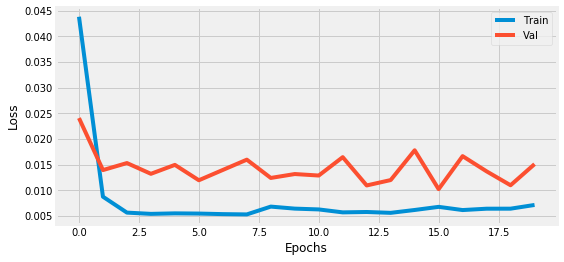

In [28]:
plt.figure(figsize=(8,4))

plt.plot(hist.history['loss'], label='Train')
plt.plot(hist.history['val_loss'], label='Val')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

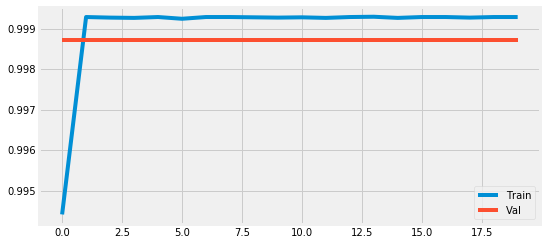

In [29]:
plt.figure(figsize=(8,4))


plt.plot(hist.history['accuracy'], label='Train', )
plt.plot(hist.history['val_accuracy'], label='Val')
plt.legend();

## Model Evaluation

In [97]:
model.evaluate(X_train_ss, y_train, verbose=2)

93370/1 - 5s - loss: 0.0065 - accuracy: 0.9991


[0.009835765229311063, 0.9991432]

In [98]:
model.evaluate(X_test_ss, y_test, verbose=2)

31124/1 - 2s - loss: 0.0063 - accuracy: 0.9992


[0.007732898837378898, 0.99916464]

In [101]:
y_pred = model.predict(X_test_ss)

recall = tf.metrics.Recall()
spec = tf.metrics.SpecificityAtSensitivity(sens)
roc = tf.keras.metrics.AUC()

roc.update_state(y_test, y_pred)
recall.update_state(y_test, y_pred)
spec.update_state(y_pred=y_pred, y_true=y_test)

specificity = spec.result().numpy()
sens = recall.result().numpy()

In [102]:
print(f"Sensitivity = {sens}")
print(f"Specificity = {specificity}")
print(f"AUC = {roc.result().numpy()}")

Sensitivity = 0.9991646409034729
Specificity = 0.9987790584564209
AUC = 0.9993308186531067


### ROC AUC 

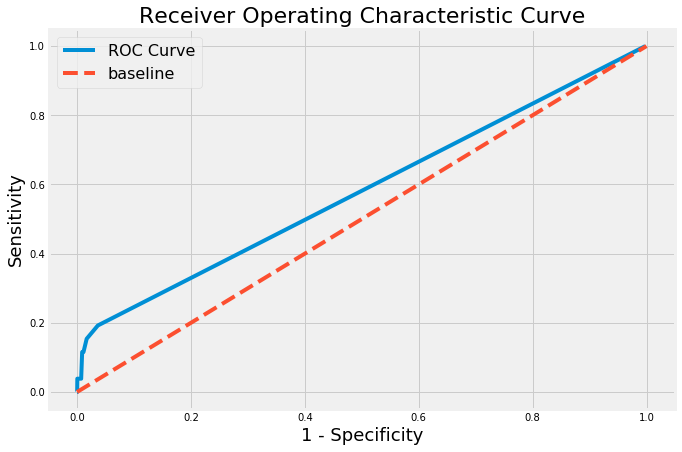

In [112]:
pred_proba = [i[1] for i in model.predict_proba(X_test_ss)]
pred_df = pd.DataFrame({'true_values': y_test, 'pred_probs': pred_proba})

# Create figure.
plt.figure(figsize=(10, 7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)


def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1)
                       & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1)
                        & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)


# Define function to calculate 1 - specificity. (False positive rate.)


def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0)
                       & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0)
                        & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))


# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [
    TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds
]
fpr_values = [
    FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds
]

# Plot ROC curve.
plt.plot(
    fpr_values,  # False Positive Rate on X-axis
    tpr_values,  # True Positive Rate on Y-axis
    label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16)

In [117]:
from sklearn.metrics import roc_auc_score, classification_report

In [115]:
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

0.5656003106803802

## Results


In [118]:
print(classification_report(y_test, preds))

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets